#IMPORTS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_excel("/content/drive/MyDrive/train(1).xlsx")
test = pd.read_excel("/content/drive/MyDrive/test2.xlsx")

In [3]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


#EDA

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [5]:
assert train["price"].isnull().sum() == 0

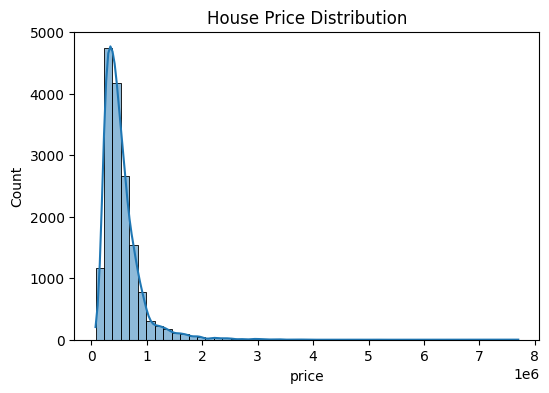

In [6]:
plt.figure(figsize=(6,4))
sns.histplot(train['price'], bins=50, kde=True)
plt.title("House Price Distribution")
plt.show()

In [7]:
train["log_price"] = np.log1p(train["price"])

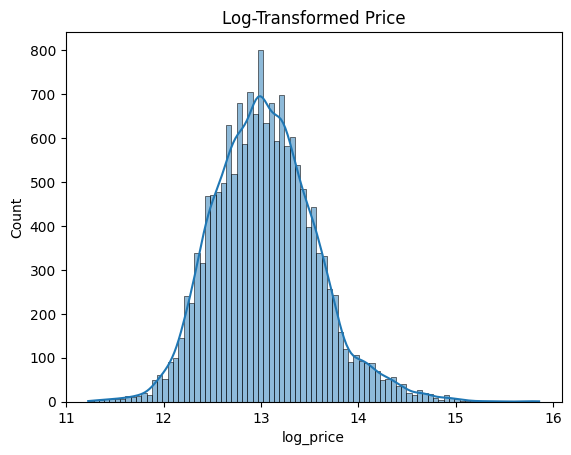

In [8]:

sns.histplot(train['log_price'], kde=True)
plt.title("Log-Transformed Price")
plt.show()

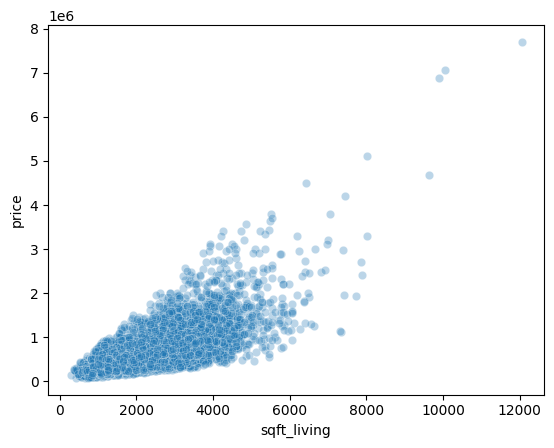

In [9]:
sns.scatterplot(x='sqft_living', y='price', data=train, alpha=0.3)
plt.show()

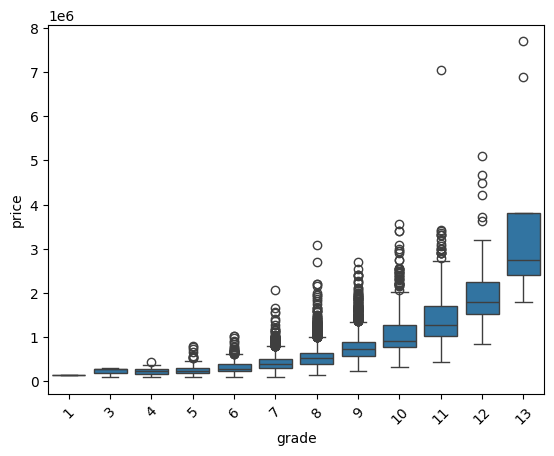

In [10]:
sns.boxplot(x='grade', y='price', data=train)
plt.xticks(rotation=45)
plt.show()

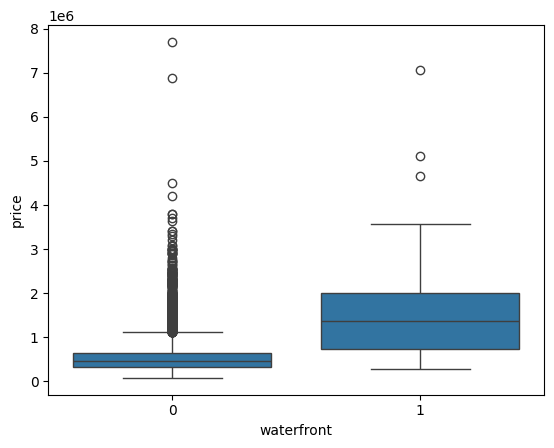

In [11]:
sns.boxplot(x='waterfront', y='price', data=train)
plt.show()

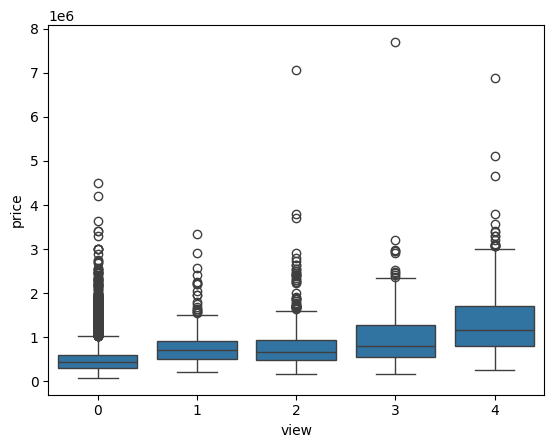

In [12]:
sns.boxplot(x='view', y='price', data=train)
plt.show()

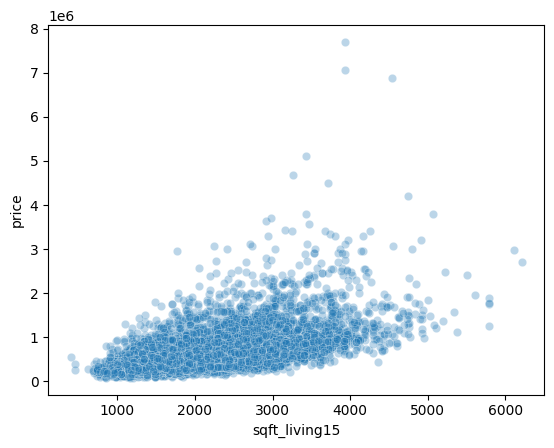

In [13]:
sns.scatterplot(
    x='sqft_living15',
    y='price',
    data=train,
    alpha=0.3
)
plt.show()

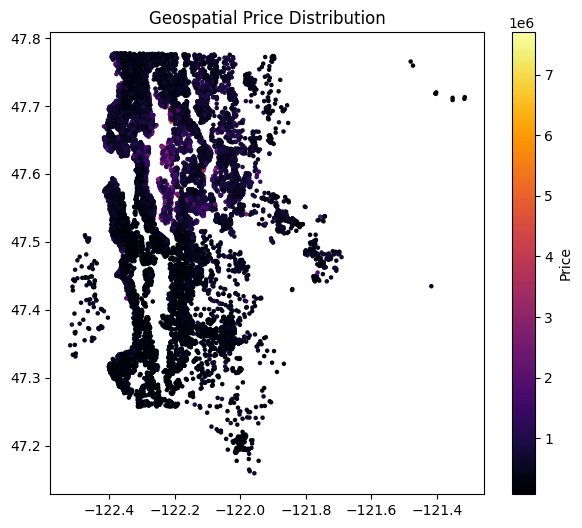

In [14]:
plt.figure(figsize=(7,6))
plt.scatter(
    train['long'],
    train['lat'],
    c=train['price'],
    cmap='inferno',
    s=5
)
plt.colorbar(label="Price")
plt.title("Geospatial Price Distribution")
plt.show()

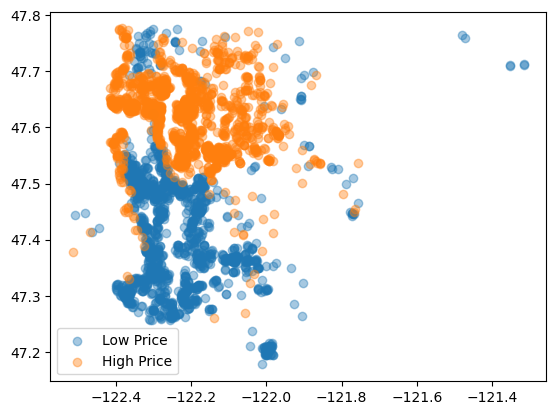

In [15]:
high_price = train[train['price'] > train['price'].quantile(0.9)]
low_price = train[train['price'] < train['price'].quantile(0.1)]

plt.scatter(low_price['long'], low_price['lat'], label="Low Price", alpha=0.4)
plt.scatter(high_price['long'], high_price['lat'], label="High Price", alpha=0.4)
plt.legend()
plt.show()

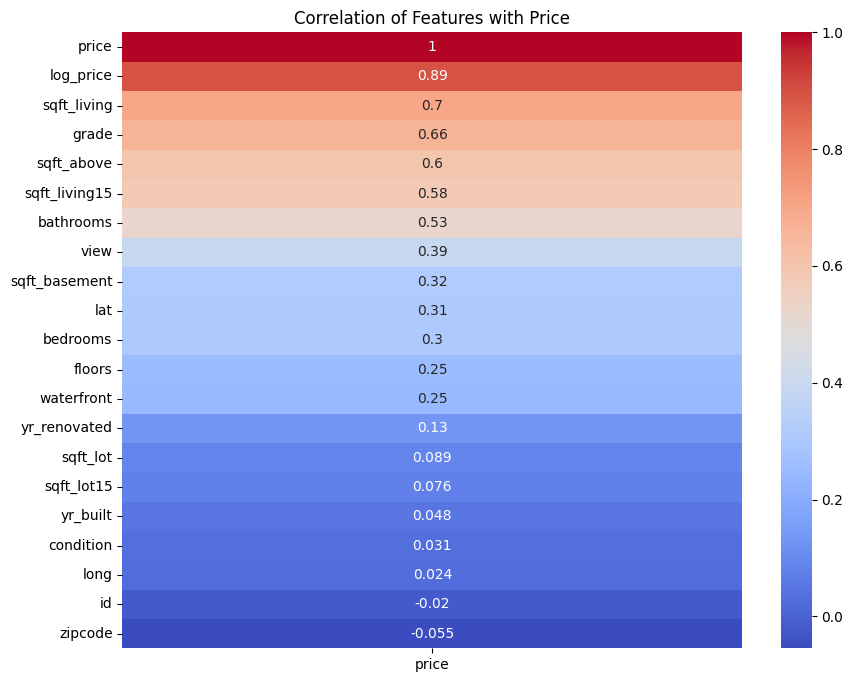

In [16]:
numeric_train = train.select_dtypes(include=['int64', 'float64'])
corr = numeric_train.corr()

plt.figure(figsize=(10,8))
sns.heatmap(
    corr[['price']]
    .sort_values(by='price', ascending=False),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation of Features with Price")
plt.show()

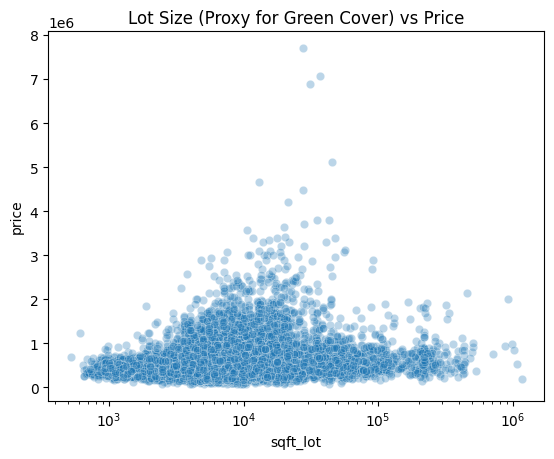

In [17]:
sns.scatterplot(
    x='sqft_lot',
    y='price',
    data=train,
    alpha=0.3
)
plt.xscale('log')
plt.title("Lot Size (Proxy for Green Cover) vs Price")
plt.show()

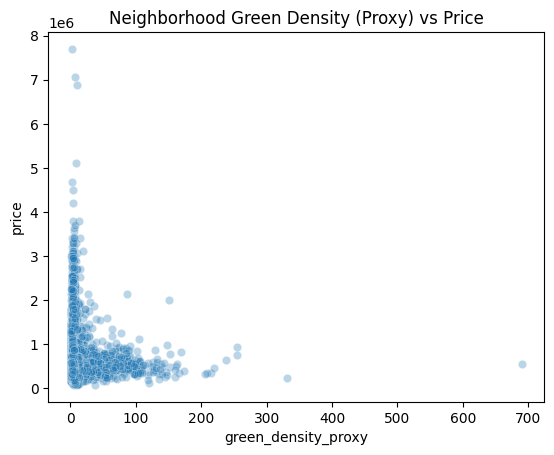

In [18]:
train['green_density_proxy'] = train['sqft_lot15'] / train['sqft_living15']

sns.scatterplot(
    x='green_density_proxy',
    y='price',
    data=train,
    alpha=0.3
)
plt.title("Neighborhood Green Density (Proxy) vs Price")
plt.show()

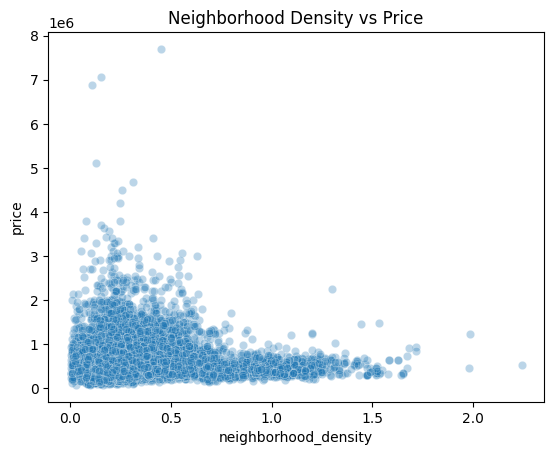

In [19]:
train['neighborhood_density'] = train['sqft_living15'] / train['sqft_lot15']

sns.scatterplot(
    x='neighborhood_density',
    y='price',
    data=train,
    alpha=0.3
)
plt.title("Neighborhood Density vs Price")
plt.show()

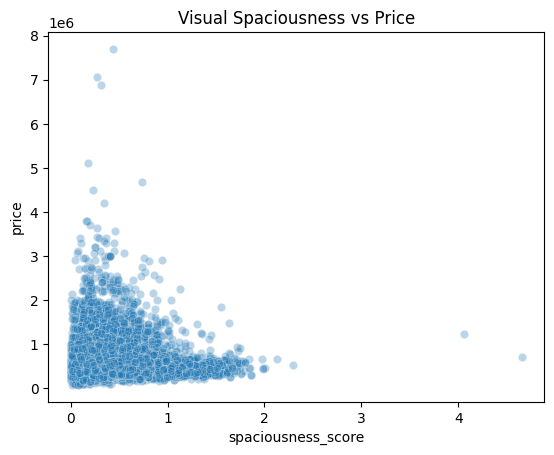

In [20]:
train['spaciousness_score'] = train['sqft_living'] / train['sqft_lot']

sns.scatterplot(
    x='spaciousness_score',
    y='price',
    data=train,
    alpha=0.3
)
plt.title("Visual Spaciousness vs Price")
plt.show()

In [21]:
from sklearn.cluster import KMeans

coords = train[['lat', 'long']]
kmeans = KMeans(n_clusters=5, random_state=42)
train['location_cluster'] = kmeans.fit_predict(coords)

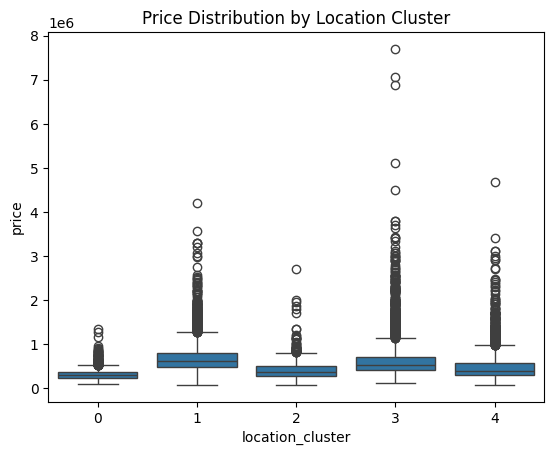

In [22]:
sns.boxplot(
    x='location_cluster',
    y='price',
    data=train
)
plt.title("Price Distribution by Location Cluster")
plt.show()

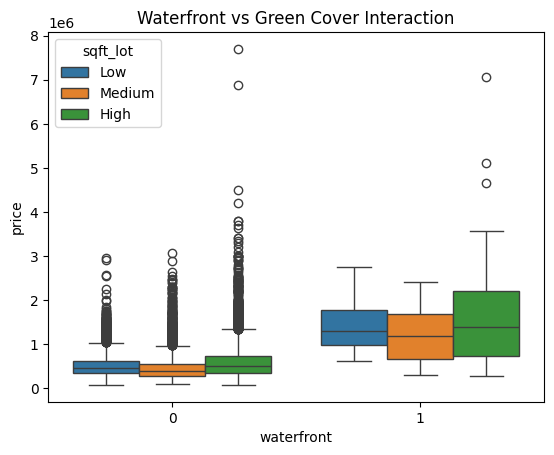

In [23]:
sns.boxplot(
    x='waterfront',
    y='price',
    hue=pd.qcut(train['sqft_lot'], 3, labels=['Low','Medium','High']),
    data=train
)
plt.title("Waterfront vs Green Cover Interaction")
plt.show()

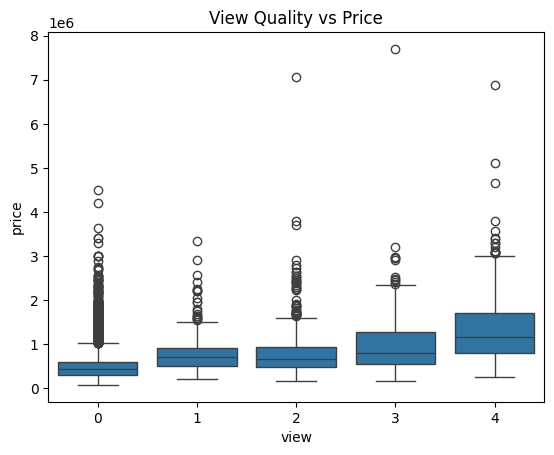

In [24]:
sns.boxplot(
    x='view',
    y='price',
    data=train
)
plt.title("View Quality vs Price")
plt.show()

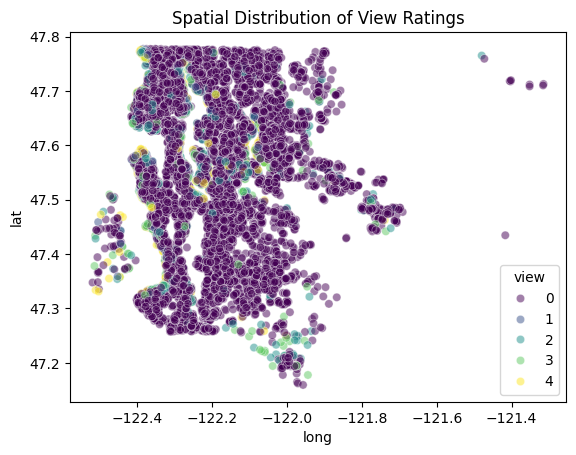

In [25]:
sns.scatterplot(
    x='long',
    y='lat',
    hue='view',
    data=train,
    palette='viridis',
    alpha=0.5
)
plt.title("Spatial Distribution of View Ratings")
plt.show()

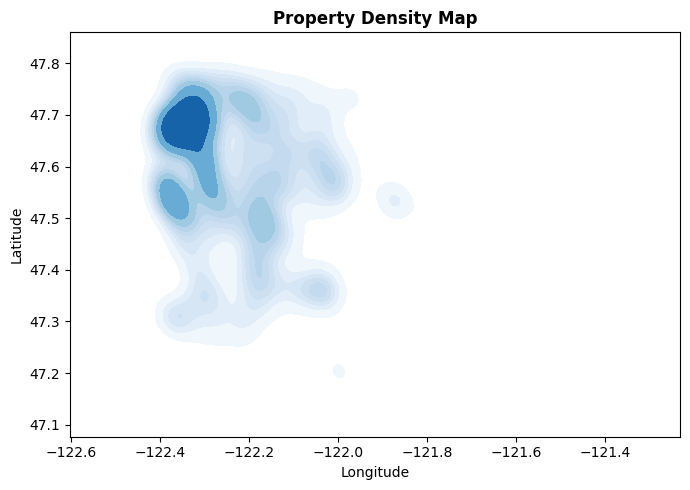

In [26]:
plt.figure(figsize=(7, 5))
sns.kdeplot(
    x=train["long"],
    y=train["lat"],
    fill=True,
    cmap="Blues",
    thresh=0.1
)
plt.title("Property Density Map", fontsize=12, fontweight="bold")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

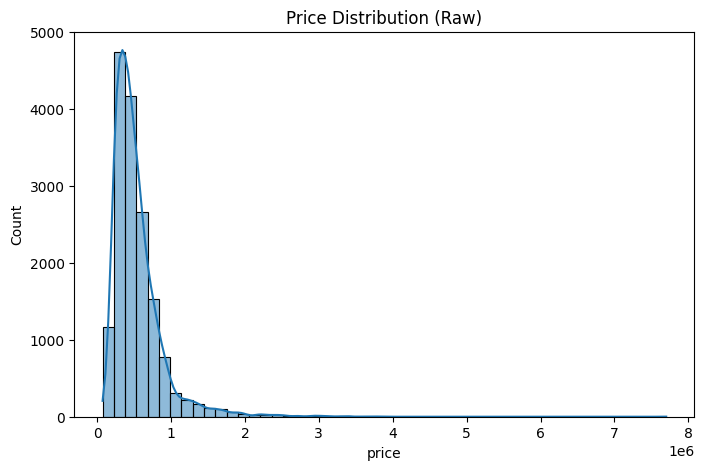

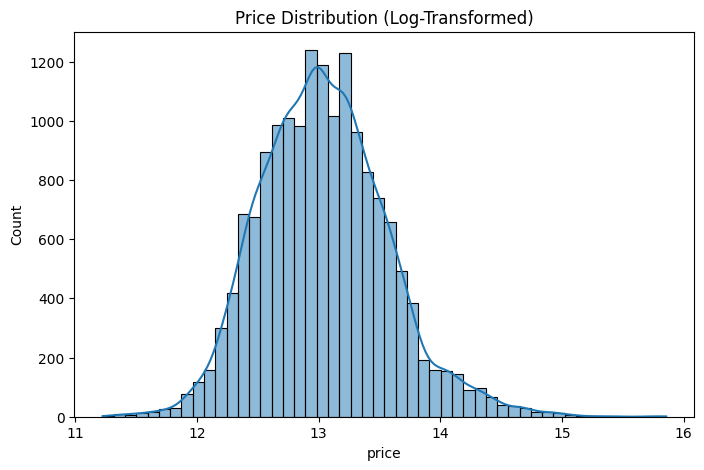

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(train["price"], bins=50, kde=True)
plt.title("Price Distribution (Raw)")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(np.log1p(train["price"]), bins=50, kde=True)
plt.title("Price Distribution (Log-Transformed)")
plt.show()


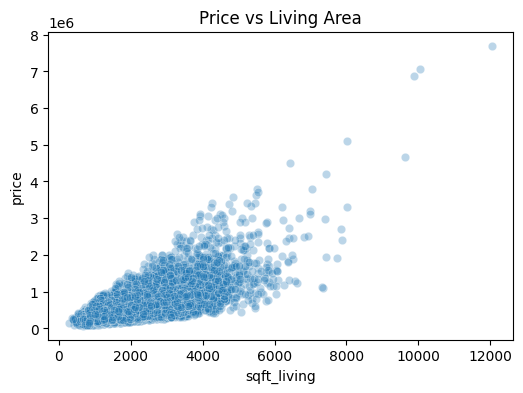

In [28]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="sqft_living", y="price", data=train, alpha=0.3)
plt.title("Price vs Living Area")
plt.show()


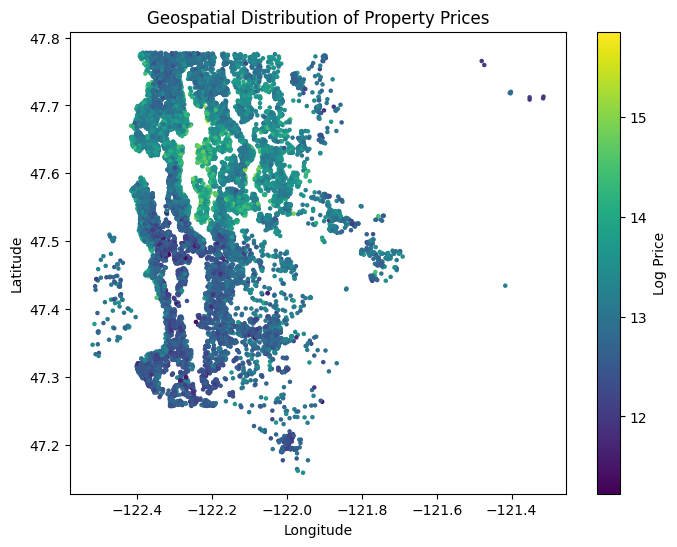

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(
    train["long"],
    train["lat"],
    c=np.log1p(train["price"]),
    cmap="viridis",
    s=5
)
plt.colorbar(label="Log Price")
plt.title("Geospatial Distribution of Property Prices")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


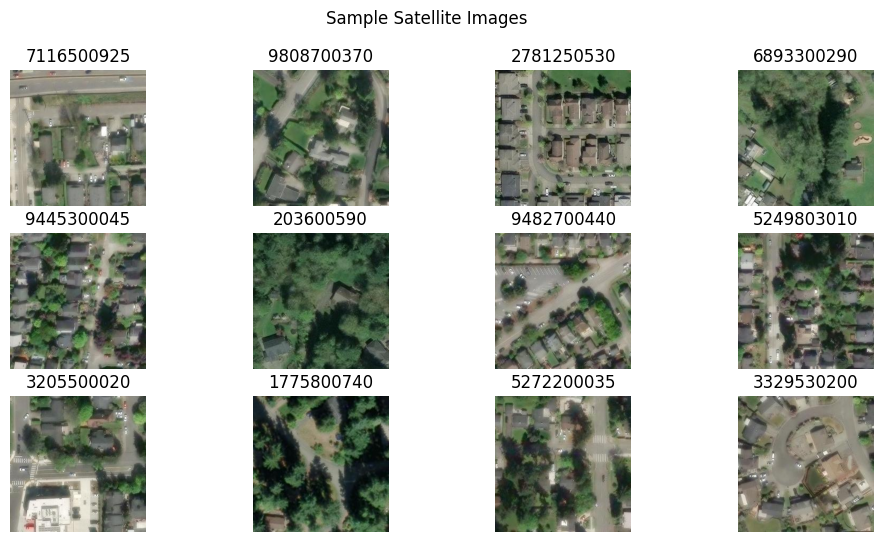

In [30]:
from PIL import Image
import os
import random

IMAGE_DIR = "/content/drive/MyDrive/property_val/property_images_train_zoom_18"

sample_ids = random.sample(os.listdir(IMAGE_DIR), 12)

plt.figure(figsize=(12,6))
for i, img_name in enumerate(sample_ids):
    img = Image.open(os.path.join(IMAGE_DIR, img_name))
    plt.subplot(3, 4, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(img_name.split(".")[0])

plt.suptitle("Sample Satellite Images")
plt.show()


In [39]:
cheap = train.nsmallest(4, "price")
expensive = train.nlargest(4, "price")

compare_df = pd.concat([cheap, expensive]).reset_index(drop=True)
compare_df[["id", "price"]]


,id,price
0,3421079032,75000
1,8658300340,80000
2,3028200080,81000
3,3883800011,82000
4,6762700020,7700000
5,9808700762,7062500
6,9208900037,6885000
7,1247600105,5110800


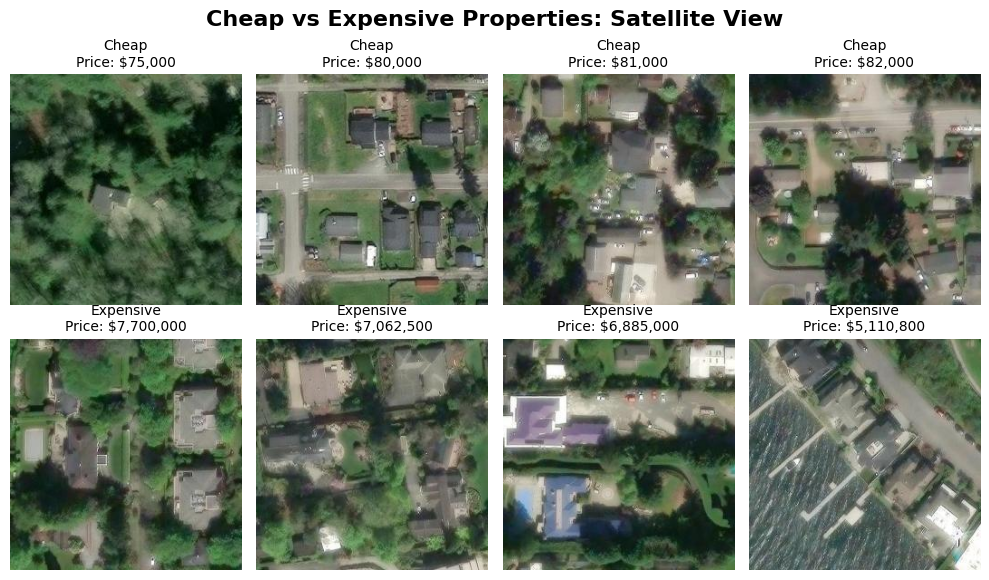

In [40]:
plt.figure(figsize=(10, 6))

for i, (_, row) in enumerate(compare_df.iterrows()):
    img_id = row["id"]
    img_path = os.path.join(IMAGE_DIR, f"{img_id}.jpg")

    img = Image.open(img_path)

    plt.subplot(2, 4, i + 1)
    plt.imshow(img)
    plt.axis("off")

    label = "Cheap" if i < 4 else "Expensive"
    plt.title(
        f"{label}\nPrice: ${int(row['price']):,}",
        fontsize=10
    )

plt.suptitle(
    "Cheap vs Expensive Properties: Satellite View",
    fontsize=16,
    fontweight="bold"
)
plt.tight_layout()
plt.show()


#BASELINE TABULAR MODELS

In [41]:
features = [
    "bedrooms", "bathrooms", "sqft_living",
    "sqft_lot", "floors",
    "condition", "grade",
    "waterfront", "view",
    "sqft_living15", "sqft_lot15",
    "lat", "long"
]

In [42]:
X = train[features]
y = train["log_price"]

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [44]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [45]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=300, n_jobs=-1,
                      random_state=42)

In [46]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42
)

xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate(model):
    preds_log = model.predict(X_val)
    preds = np.expm1(preds_log)
    y_true = np.expm1(y_val)

    # Removed 'squared=False' and compute RMSE explicitly
    rmse = np.sqrt(mean_squared_error(y_true, preds))
    r2 = r2_score(y_true, preds)

    return rmse, r2
for name, model in {
    "Linear": lr,
    "RandomForest": rf,
    "XGBoost": xgb
}.items():
    rmse, r2 = evaluate(model)
    print(f"{name} → RMSE: {rmse:.2f}, R²: {r2:.4f}")

Linear → RMSE: 188236.98, R²: 0.7176
RandomForest → RMSE: 131632.47, R²: 0.8619
XGBoost → RMSE: 115520.37, R²: 0.8937


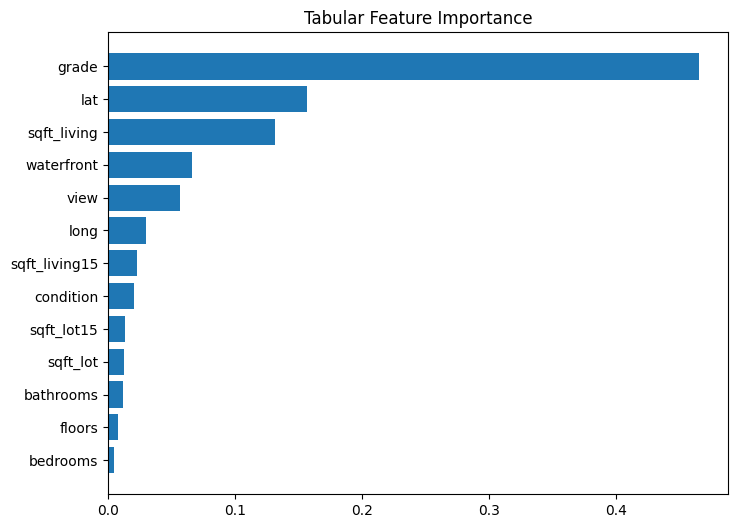

In [48]:
import matplotlib.pyplot as plt

importances = xgb.feature_importances_
idx = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.barh(np.array(features)[idx], importances[idx])
plt.title("Tabular Feature Importance")
plt.show()
